In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
Table1 = pd.read_csv('Table1_csv')
Table2 = pd.read_csv('Table2_csv')
Table3 = pd.read_csv('Table3_csv')

In [3]:
Table1 = pd.read_csv('Table1_csv')
Table1

,Unnamed: 0,Address,Postal_code,City,Country,Price
0,0,550 Valencia Place Circle,550.0,NaN,550 Valencia Place Circle,207550.0
1,1,"Cason Cove Drive, Orlando, FL 32811, USA",32811.0,Orlando,USA,103775.0
2,2,"5473 Caramella Drive, Orlando, FL 32829, USA",5473.0,Orlando,USA,207550.0
3,3,"2644 Nancy Street, Orlando, FL 32806, USA",2644.0,Orlando,USA,174342.0
4,4,"9053 Lee Vista Boulevard, Orlando, FL 32829, USA",9053.0,Orlando,USA,174342.0
...,...,...,...,...,...,...
5320,5320,"Warsaw, Masovian Voivodeship, Poland",NaN,Warsaw,Poland,187659.0
5321,5321,"04-359 Warsaw, Poland",4.0,NaN,Poland,329240.0
5322,5322,"Aleje Ujazdowskie 16, 00-478 Warsaw, Poland",16.0,Aleje Ujazdowskie 16,Poland,39477.0
5323,5323,"Józefa Bellottiego 3, 01-022 Warsaw, Poland",1.0,Józefa Bellottiego 3,Poland,34139.0


In [4]:
Table12 = pd.read_csv('Table2_csv')
Table2

,Unnamed: 0,Bed,Bath,Area,Pets
0,0,4,2.5,1846.0,NaN
1,1,1,1,600.0,NaN
2,2,3,2.5,1675.0,NaN
3,3,3,2,1796.0,NaN
4,4,3,2,1202.0,NaN
...,...,...,...,...,...
5320,5320,1,1,517.0,No pets
5321,5321,2,2,689.0,No pets
5322,5322,6,Null,0.0,Null
5323,5323,6,1,0.0,Null


In [5]:
Table3 = pd.read_csv('Table3_csv')
Table3

,Unnamed: 0,Dishwasher,AC
0,0,Null,Null
1,1,Null,Null
2,2,Null,Null
3,3,Null,Null
4,4,Null,Null
...,...,...,...
5320,5320,Elevator,Air Conditioning
5321,5321,Dishwasher,Balcony
5322,5322,Null,Washer/Dryer In Unit
5323,5323,Null,Washer/Dryer In Unit


In [6]:
T = pd.concat([Table1,Table2,Table3], axis = 1)
T

,Unnamed: 0,Address,Postal_code,City,Country,Price,Unnamed: 0,Bed,Bath,Area,Pets,Unnamed: 0,Dishwasher,AC
0,0,550 Valencia Place Circle,550.0,NaN,550 Valencia Place Circle,207550.0,0,4,2.5,1846.0,NaN,0,Null,Null
1,1,"Cason Cove Drive, Orlando, FL 32811, USA",32811.0,Orlando,USA,103775.0,1,1,1,600.0,NaN,1,Null,Null
2,2,"5473 Caramella Drive, Orlando, FL 32829, USA",5473.0,Orlando,USA,207550.0,2,3,2.5,1675.0,NaN,2,Null,Null
3,3,"2644 Nancy Street, Orlando, FL 32806, USA",2644.0,Orlando,USA,174342.0,3,3,2,1796.0,NaN,3,Null,Null
4,4,"9053 Lee Vista Boulevard, Orlando, FL 32829, USA",9053.0,Orlando,USA,174342.0,4,3,2,1202.0,NaN,4,Null,Null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5320,5320,"Warsaw, Masovian Voivodeship, Poland",NaN,Warsaw,Poland,187659.0,5320,1,1,517.0,No pets,5320,Elevator,Air Conditioning
5321,5321,"04-359 Warsaw, Poland",4.0,NaN,Poland,329240.0,5321,2,2,689.0,No pets,5321,Dishwasher,Balcony
5322,5322,"Aleje Ujazdowskie 16, 00-478 Warsaw, Poland",16.0,Aleje Ujazdowskie 16,Poland,39477.0,5322,6,Null,0.0,Null,5322,Null,Washer/Dryer In Unit
5323,5323,"Józefa Bellottiego 3, 01-022 Warsaw, Poland",1.0,Józefa Bellottiego 3,Poland,34139.0,5323,6,1,0.0,Null,5323,Null,Washer/Dryer In Unit


AM dropping the column name unnamed:0 because is just an index

In [7]:
T = T.drop(columns=['Unnamed: 0'])
T.head()

,Address,Postal_code,City,Country,Price,Bed,Bath,Area,Pets,Dishwasher,AC
0,550 Valencia Place Circle,550.0,NaN,550 Valencia Place Circle,207550.0,4,2.5,1846.0,NaN,Null,Null
1,"Cason Cove Drive, Orlando, FL 32811, USA",32811.0,Orlando,USA,103775.0,1,1,600.0,NaN,Null,Null
2,"5473 Caramella Drive, Orlando, FL 32829, USA",5473.0,Orlando,USA,207550.0,3,2.5,1675.0,NaN,Null,Null
3,"2644 Nancy Street, Orlando, FL 32806, USA",2644.0,Orlando,USA,174342.0,3,2,1796.0,NaN,Null,Null
4,"9053 Lee Vista Boulevard, Orlando, FL 32829, USA",9053.0,Orlando,USA,174342.0,3,2,1202.0,NaN,Null,Null


In [8]:
T.shape

(5325, 11)

In [9]:
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5325 entries, 0 to 5324
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      5325 non-null   object 
 1   Postal_code  4112 non-null   float64
 2   City         3253 non-null   object 
 3   Country      5325 non-null   object 
 4   Price        5303 non-null   float64
 5   Bed          5325 non-null   object 
 6   Bath         5325 non-null   object 
 7   Area         5325 non-null   object 
 8   Pets         4995 non-null   object 
 9   Dishwasher   5325 non-null   object 
 10  AC           5325 non-null   object 
dtypes: float64(2), object(9)
memory usage: 457.7+ KB


In [10]:
T.isnull().sum()

Address           0
Postal_code    1213
City           2072
Country           0
Price            22
Bed               0
Bath              0
Area              0
Pets            330
Dishwasher        0
AC                0
dtype: int64

In [11]:
T.count()

Address        5325
Postal_code    4112
City           3253
Country        5325
Price          5303
Bed            5325
Bath           5325
Area           5325
Pets           4995
Dishwasher     5325
AC             5325
dtype: int64

#The dataframe contain object and float data type and null values which shall be address accordingly

In [12]:
T['Price']= np.ceil(T['Price'].fillna(T['Price'].mean()))

In [13]:
T['Postal_code']= T['Postal_code'].fillna(T['Postal_code'].mode()[0])

In [14]:
T

,Address,Postal_code,City,Country,Price,Bed,Bath,Area,Pets,Dishwasher,AC
0,550 Valencia Place Circle,550.0,NaN,550 Valencia Place Circle,207550.0,4,2.5,1846.0,NaN,Null,Null
1,"Cason Cove Drive, Orlando, FL 32811, USA",32811.0,Orlando,USA,103775.0,1,1,600.0,NaN,Null,Null
2,"5473 Caramella Drive, Orlando, FL 32829, USA",5473.0,Orlando,USA,207550.0,3,2.5,1675.0,NaN,Null,Null
3,"2644 Nancy Street, Orlando, FL 32806, USA",2644.0,Orlando,USA,174342.0,3,2,1796.0,NaN,Null,Null
4,"9053 Lee Vista Boulevard, Orlando, FL 32829, USA",9053.0,Orlando,USA,174342.0,3,2,1202.0,NaN,Null,Null
...,...,...,...,...,...,...,...,...,...,...,...
5320,"Warsaw, Masovian Voivodeship, Poland",1.0,Warsaw,Poland,187659.0,1,1,517.0,No pets,Elevator,Air Conditioning
5321,"04-359 Warsaw, Poland",4.0,NaN,Poland,329240.0,2,2,689.0,No pets,Dishwasher,Balcony
5322,"Aleje Ujazdowskie 16, 00-478 Warsaw, Poland",16.0,Aleje Ujazdowskie 16,Poland,39477.0,6,Null,0.0,Null,Null,Washer/Dryer In Unit
5323,"Józefa Bellottiego 3, 01-022 Warsaw, Poland",1.0,Józefa Bellottiego 3,Poland,34139.0,6,1,0.0,Null,Null,Washer/Dryer In Unit


In [15]:
T.isnull().sum()

Address           0
Postal_code       0
City           2072
Country           0
Price             0
Bed               0
Bath              0
Area              0
Pets            330
Dishwasher        0
AC                0
dtype: int64

In [16]:
numerical_columns = T.select_dtypes(include=['int','float']).columns
categorical_columns = T.select_dtypes(include=['object']).columns

Tnumerical = T[numerical_columns]
Tcategorical = T[categorical_columns]

In [17]:
for i in Tcategorical:
    Tcategorical[i]=Tcategorical[i].fillna(Tcategorical[i].mode()[0])

<AxesSubplot:>

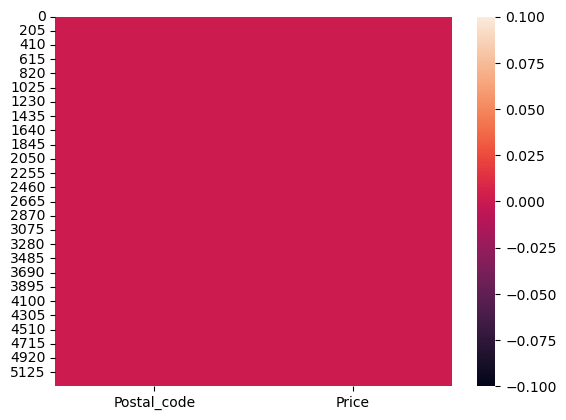

In [18]:
sns.heatmap(Tnumerical.isnull())

<AxesSubplot:>

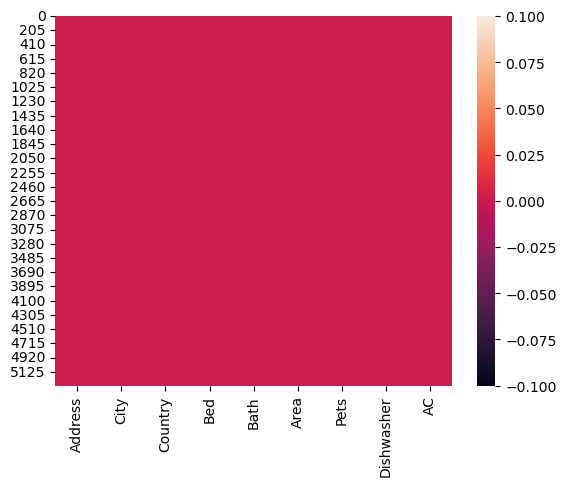

In [19]:
sns.heatmap(Tcategorical.isnull())

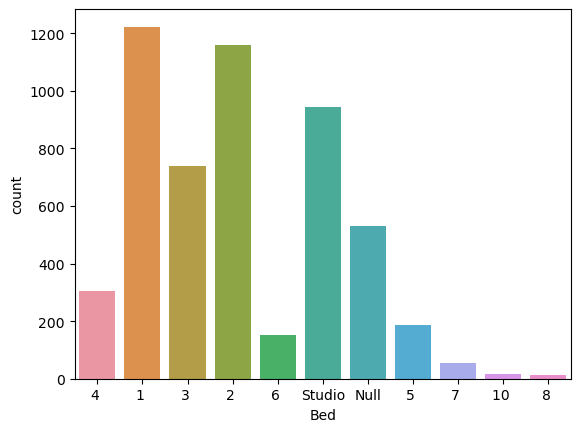

In [20]:
sns.countplot(x='Bed',data = T)
plt.show()

<AxesSubplot:xlabel='Bed', ylabel='Price'>

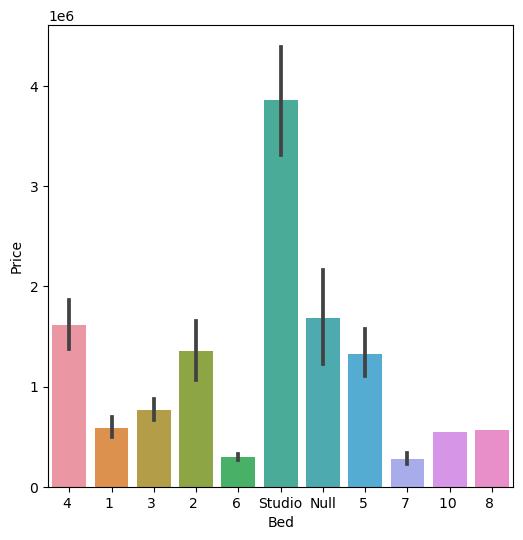

In [21]:
plt.figure(figsize=(6,6))
sns.barplot(x = 'Bed', y = 'Price', data = T)

<Figure size 1000x4000 with 0 Axes>

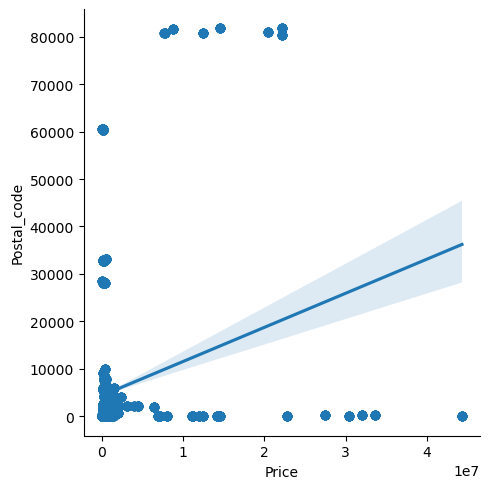

In [22]:
plt.figure(figsize=(10,40))
sns.lmplot(x = 'Price', y = 'Postal_code', data = Tnumerical)

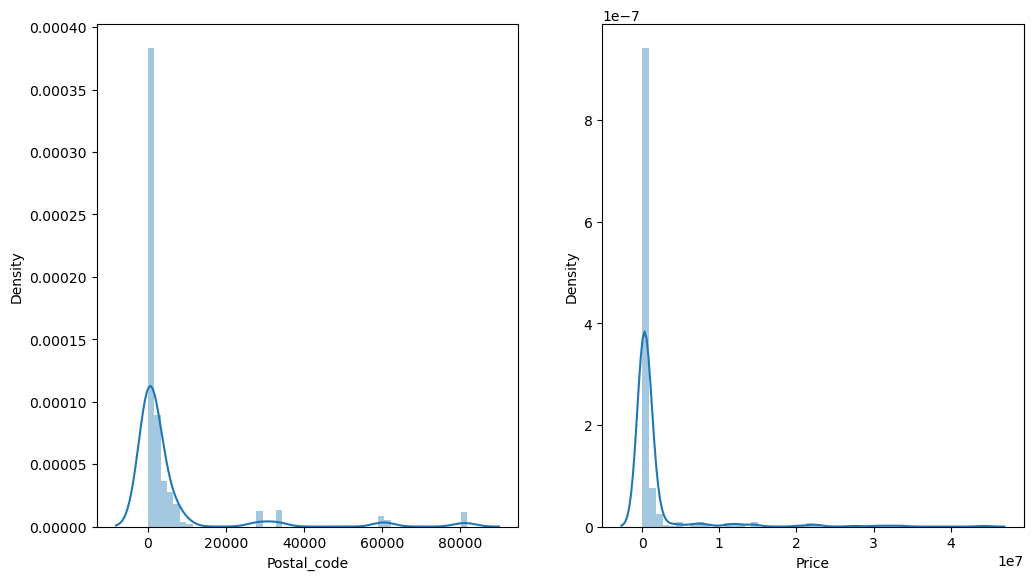

In [23]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Tnumerical.columns:
    if pd.api.types.is_numeric_dtype(Tnumerical[column]):
        if plotnumber<=6:
            ax = plt.subplot(4,4,plotnumber)
            sns.distplot(T[column])
            plt.xlabel(column,fontsize = 10)
        plotnumber+=1
plt.show()

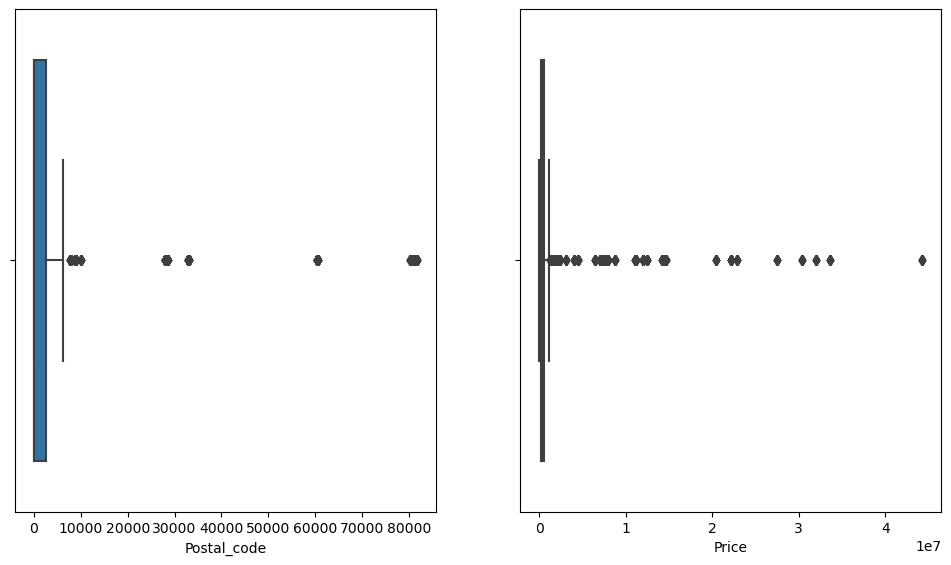

In [24]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Tnumerical.columns:
    if pd.api.types.is_numeric_dtype(Tnumerical[column]):
        if plotnumber<=6:
            ax = plt.subplot(4,4,plotnumber)
            sns.boxplot(Tnumerical[column])
            plt.xlabel(column,fontsize = 10)
        plotnumber+=1
plt.show()

In [25]:
q1 = Tnumerical.quantile(0.25)
q3 = Tnumerical.quantile(0.75)
iqr = q3-q1
q1

Postal_code         1.0
Price          143839.0
Name: 0.25, dtype: float64

In [26]:
Postal_code_high = (q1['Postal_code']+(1.5*iqr['Postal_code']))
print(Postal_code_high)

index = np.where(T['Postal_code']>Postal_code_high)

Tnumerical = Tnumerical.drop(T.index[index])
print(Tnumerical.shape)

Tnumerical.reset_index()

3965.5
(4205, 2)


,index,Postal_code,Price
0,0,550.0,207550.0
1,3,2644.0,174342.0
2,6,1701.0,348684.0
3,7,1.0,637594.0
4,9,2442.0,190946.0
...,...,...,...
4200,5320,1.0,187659.0
4201,5321,4.0,329240.0
4202,5322,16.0,39477.0
4203,5323,1.0,34139.0


In [27]:
Tnumerical.skew()

Postal_code    1.671398
Price          5.690110
dtype: float64

In [28]:
Tnumerical['Postal_code'] = np.cbrt(Tnumerical['Postal_code'])
Tnumerical.reset_index()
print(Tnumerical.shape)

(4205, 2)


In [29]:
Tnumerical.skew()

Postal_code    0.952187
Price          5.690110
dtype: float64

In [41]:
Tnumerical.isnull().sum()

Postal_code    0
Price          0
dtype: int64

In [31]:
Tcategorical['Address'] = Tcategorical['Address'].values.reshape(-1, 1)

In [42]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
OE = OrdinalEncoder()
for i in Tcategorical.columns:
    if Tcategorical[i].dtypes == 'object':
        Tcategorical[i] = OE.fit_transform(Tcategorical[i].values.reshape(-1,1))
Tcategorical.head()

,Address,City,Country,Bed,Bath,Area,Pets,Dishwasher,AC
0,46.0,70.0,17.0,4.0,5.0,37.0,4.0,10.0,7.0
1,100.0,87.0,28.0,0.0,1.0,93.0,4.0,10.0,7.0
2,45.0,87.0,28.0,3.0,5.0,29.0,4.0,10.0,7.0
3,33.0,87.0,28.0,3.0,4.0,35.0,4.0,10.0,7.0
4,56.0,87.0,28.0,3.0,4.0,18.0,4.0,10.0,7.0


In [43]:
New_Data = pd.concat([Tcategorical,Tnumerical], axis=1)
New_Data.head()

,Address,City,Country,Bed,Bath,Area,Pets,Dishwasher,AC,Postal_code,Price
0,46.0,70.0,17.0,4.0,5.0,37.0,4.0,10.0,7.0,8.193213,207550.0
1,100.0,87.0,28.0,0.0,1.0,93.0,4.0,10.0,7.0,NaN,NaN
2,45.0,87.0,28.0,3.0,5.0,29.0,4.0,10.0,7.0,NaN,NaN
3,33.0,87.0,28.0,3.0,4.0,35.0,4.0,10.0,7.0,13.827823,174342.0
4,56.0,87.0,28.0,3.0,4.0,18.0,4.0,10.0,7.0,NaN,NaN


In [44]:
New_Data['Price']= np.ceil(New_Data['Price'].fillna(New_Data['Price'].mean()))
New_Data['Postal_code']= New_Data['Postal_code'].fillna(New_Data['Postal_code'].mode()[0])

In [45]:
New_Data.isnull().sum()

Address        0
City           0
Country        0
Bed            0
Bath           0
Area           0
Pets           0
Dishwasher     0
AC             0
Postal_code    0
Price          0
dtype: int64

In [46]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5325 entries, 0 to 5324
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      5325 non-null   float64
 1   City         5325 non-null   float64
 2   Country      5325 non-null   float64
 3   Bed          5325 non-null   float64
 4   Bath         5325 non-null   float64
 5   Area         5325 non-null   float64
 6   Pets         5325 non-null   float64
 7   Dishwasher   5325 non-null   float64
 8   AC           5325 non-null   float64
 9   Postal_code  5325 non-null   float64
 10  Price        5325 non-null   float64
dtypes: float64(11)
memory usage: 499.2 KB


In [47]:
Features = New_Data.drop(columns = ['Price'])
Label = New_Data['Price']

In [48]:
scaler = StandardScaler()
Features = pd.DataFrame(scaler.fit_transform(Features),columns = Features.columns)
Features

,Address,City,Country,Bed,Bath,Area,Pets,Dishwasher,AC,Postal_code
0,-1.122526,0.120787,-0.972603,-0.051407,0.380205,-0.501365,0.707381,-0.106940,0.901008,0.878562
1,-0.441355,0.886272,0.864613,-1.127012,-0.658713,0.636739,0.707381,-0.106940,0.901008,-0.705248
2,-1.135140,0.886272,0.864613,-0.320308,0.380205,-0.663952,0.707381,-0.106940,0.901008,-0.705248
3,-1.286512,0.886272,0.864613,-0.320308,0.120476,-0.542012,0.707381,-0.106940,0.901008,2.119198
4,-0.996383,0.886272,0.864613,-0.320308,0.120476,-0.887508,0.707381,-0.106940,0.901008,-0.705248
...,...,...,...,...,...,...,...,...,...,...
5320,1.463401,1.786844,0.363554,-1.127012,-0.658713,0.433506,-0.401808,-1.064013,-1.193869,-0.705248
5321,-1.614483,0.120787,0.363554,-0.589210,0.120476,0.799326,-0.401808,-1.255427,-0.894601,-0.575913
5322,-0.933312,-2.490871,0.363554,0.486396,2.458042,-1.253327,0.707381,-0.106940,2.098081,-0.370607
5323,0.063216,-0.554642,0.363554,0.486396,-0.658713,-1.253327,0.707381,-0.106940,2.098081,-0.705248


In [49]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Features.values, i) for i in range(len(Features.columns))]
vif['features'] = Features.columns
vif

,vif values,features
0,1.150203,Address
1,1.070164,City
2,1.157610,Country
3,1.107606,Bed
4,1.154170,Bath
5,1.268893,Area
6,1.171358,Pets
7,1.040403,Dishwasher
8,1.411391,AC
9,1.107454,Postal_code


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor as DT

In [51]:
MaxAccu = 0
MaxRS = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(Features,Label,test_size = .30, random_state = i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print('maximum r2 score is =',MaxAccu,'\n random state = ',MaxRS)

maximum r2 score is = 0.06733680358555127 
 random state =  104


In [52]:
x_train,x_test,y_train,y_test = train_test_split(Features,Label, test_size = 0.30, random_state = MaxRS)

In [53]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_knn))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_knn))
print ('Mean squared Error:', mean_squared_error(y_test,pred_knn))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score: 0.9938247358964698
R2 score on training Data: 0.9964011260583135
Mean absolute Error: 36284.143304130164
Mean squared Error: 123698674715.30402
Root mean squared Error: 351708.22383803315


In [54]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_lr))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_lr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_lr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score: 0.06733680358555127
R2 score on training Data: 0.04574927381475602
Mean absolute Error: 1723162.4355982642
Mean squared Error: 18682472428386.28
Root mean squared Error: 4322322.573384162


In [55]:
la = Lasso()
la.fit(x_train,y_train)
pred_la = la.predict(x_test)
pred_train = la.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_la))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_la))
print ('Mean squared Error:', mean_squared_error(y_test,pred_la))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_la)))

R2 score: 0.06733674195048556
R2 score on training Data: 0.04574927381402527
Mean absolute Error: 1723161.597836804
Mean squared Error: 18682473663017.844
Root mean squared Error: 4322322.716204546


In [56]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred =log_reg.predict(x_test)
y_pred

array([  130449.,   373590.,  1796553., ...,   190946., 14589674.,
         569343.])

In [57]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7553191489361702

In [58]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred_lg = lg.predict(x_test)
pred_train = lg.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_lg)*100)
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_lg)*100)
print ('Mean squared Error:', mean_squared_error(y_test,pred_lg)*100)
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_lg)*100))


R2 score: 97.92949447908194
R2 score on training Data: 98.48778379634828
Mean absolute Error: 17023103.128911138
Mean squared Error: 41474953076398.75
Root mean squared Error: 6440105.05165861


In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
score = cross_val_score(lr,Features,Label, cv = 5, scoring ='r2')
print(score)
print(score.mean())
print('The difference r2 score and cross validation score = ', (r2_score(y_test,pred_lr)-score.mean())*100)

[ -4.40574941  -0.16311027  -4.8997745   -2.29070434 -46.3301642 ]
-11.617900544033821
The difference r2 score and cross validation score =  1168.5237347619372


In [61]:
score = cross_val_score(knn,Features,Label, cv = 5, scoring ='r2')
print(score)
print(score.mean())
print('The difference r2 score and cross validation score = ', (r2_score(y_test,pred_knn)-score.mean())*100)

[-4.18238767e+01 -1.90788314e-01 -7.52418612e-01  1.06632427e-01
 -2.52549306e+02]
-59.04195153340861
The difference r2 score and cross validation score =  6003.577626930508


In [62]:
score = cross_val_score(la,Features,Label, cv = 5, scoring ='r2')
print(score)
print(score.mean())
print('The difference r2 score and cross validation score = ', (r2_score(y_test,pred_la)-score.mean())*100)

[ -4.40574178  -0.16311005  -4.89974957  -2.29069435 -46.33003661]
-11.617866469800694
The difference r2 score and cross validation score =  1168.520321175118


In [63]:
score = cross_val_score(lg,Features,Label, cv = 5, scoring ='r2')
print(score)
print(score.mean())
print('The difference r2 score and cross validation score = ', (r2_score(y_test,pred_lg)-score.mean())*100)

[0.9949075  0.99326337 0.98410468 0.9800878  0.98519973]
0.9875126143839669
The difference r2 score and cross validation score =  -0.8217669593147514


In [64]:
from sklearn.model_selection import GridSearchCV
params_grid = {'fit_intercept':[True,False],
             'multi_class': [ 'auto'],
             'penalty': ['l1', 'l2', 'elasticnet', 'none'],
             'C': [0.001, 0.01, 0.1, 1, 10],
             'solver': ['liblinear', 'saga'] 
             }
grid_search =GridSearchCV(estimator=lg, param_grid = params_grid, cv = 5)


In [65]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False],
                         'multi_class': ['auto'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'saga']})

In [66]:
my_best_parameter = grid_search.best_params_
print(my_best_parameter)

{'C': 0.001, 'fit_intercept': True, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'saga'}


In [67]:
final_model = LogisticRegression(C= 0.01, fit_intercept= True,multi_class= 'auto',penalty='none',solver='saga')

In [68]:
final_model.fit(x_train,y_train)
prediction = final_model.predict(x_test)


In [69]:
lg.score(x_train,y_train)

0.8054735712369198

In [70]:
lg.score(x_test,y_test)

0.7553191489361702

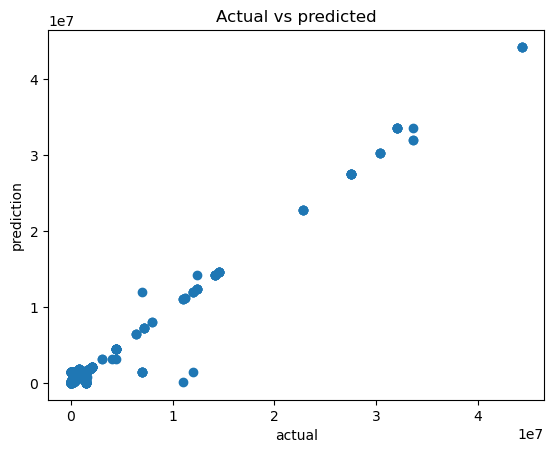

In [71]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('Actual vs predicted')
plt.show()

In [72]:
print ('R2 score:', r2_score(y_test,prediction))
print ('Mean absolute Error:', mean_absolute_error(y_test,prediction))
print ('Mean squared Error:', mean_squared_error(y_test,prediction))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,prediction)))

R2 score: 0.9935838423162353
Mean absolute Error: 86048.02002503129
Mean squared Error: 128524090458.3154
Root mean squared Error: 358502.5668782797


In [73]:
import joblib
import pickle
filename = 'Rent1.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [74]:
import pickle
loaded_final_model=pickle.load(open(filename,'rb'))
result = loaded_final_model.score(x_test,y_test)
print(result*100)

86.67083854818523


In [75]:
Features2 = New_Data.drop(columns = ['Area'])
Label2 = New_Data['Area']

In [76]:
Features2.head()

,Address,City,Country,Bed,Bath,Pets,Dishwasher,AC,Postal_code,Price
0,46.0,70.0,17.0,4.0,5.0,4.0,10.0,7.0,8.193213,207550.0
1,100.0,87.0,28.0,0.0,1.0,4.0,10.0,7.0,1.000000,1471162.0
2,45.0,87.0,28.0,3.0,5.0,4.0,10.0,7.0,1.000000,1471162.0
3,33.0,87.0,28.0,3.0,4.0,4.0,10.0,7.0,13.827823,174342.0
4,56.0,87.0,28.0,3.0,4.0,4.0,10.0,7.0,1.000000,1471162.0


In [77]:
scaler = StandardScaler()
Features2 = pd.DataFrame(scaler.fit_transform(Features2),columns = Features2.columns)
Features2

,Address,City,Country,Bed,Bath,Pets,Dishwasher,AC,Postal_code,Price
0,-1.122526,0.120787,-0.972603,-0.051407,0.380205,0.707381,-0.106940,0.901008,0.878562,-2.837749e-01
1,-0.441355,0.886272,0.864613,-1.127012,-0.658713,0.707381,-0.106940,0.901008,-0.705248,1.453303e-07
2,-1.135140,0.886272,0.864613,-0.320308,0.380205,0.707381,-0.106940,0.901008,-0.705248,1.453303e-07
3,-1.286512,0.886272,0.864613,-0.320308,0.120476,0.707381,-0.106940,0.901008,2.119198,-2.912326e-01
4,-0.996383,0.886272,0.864613,-0.320308,0.120476,0.707381,-0.106940,0.901008,-0.705248,1.453303e-07
...,...,...,...,...,...,...,...,...,...,...
5320,1.463401,1.786844,0.363554,-1.127012,-0.658713,-0.401808,-1.064013,-1.193869,-0.705248,-2.882420e-01
5321,-1.614483,0.120787,0.363554,-0.589210,0.120476,-0.401808,-1.255427,-0.894601,-0.575913,-2.564465e-01
5322,-0.933312,-2.490871,0.363554,0.486396,2.458042,0.707381,-0.106940,2.098081,-0.370607,-3.215199e-01
5323,0.063216,-0.554642,0.363554,0.486396,-0.658713,0.707381,-0.106940,2.098081,-0.705248,-3.227186e-01


In [78]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Features2.values, i) for i in range(len(Features2.columns))]
vif['features2'] = Features2.columns
vif

,vif values,features2
0,1.152567,Address
1,1.070937,City
2,1.148202,Country
3,1.115738,Bed
4,1.153506,Bath
5,1.186805,Pets
6,1.052633,Dishwasher
7,1.189577,AC
8,1.092463,Postal_code
9,1.054519,Price


In [79]:
MaxAccu = 0
MaxRS = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(Features2,Label2,test_size = .30, random_state = i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print('maximum r2 score is =',MaxAccu,'\n random state = ',MaxRS)

maximum r2 score is = 0.25433619704823995 
 random state =  150


In [80]:
x_train,x_test,y_train,y_test = train_test_split(Features,Label, test_size = 0.30, random_state = MaxRS)

In [81]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_knn))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_knn))
print ('Mean squared Error:', mean_squared_error(y_test,pred_knn))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score: 0.9991295307839682
R2 score on training Data: 0.996943576750388
Mean absolute Error: 21545.05694618273
Mean squared Error: 16881856789.39437
Root mean squared Error: 129930.19968196143


In [82]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_lr))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_lr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_lr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score: 0.03502558786639476
R2 score on training Data: 0.05877836168890771
Mean absolute Error: 1765671.7191449846
Mean squared Error: 18714688045296.88
Root mean squared Error: 4326047.624020901


In [83]:
la = Lasso()
la.fit(x_train,y_train)
pred_la = la.predict(x_test)
pred_train = la.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_la))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_la))
print ('Mean squared Error:', mean_squared_error(y_test,pred_la))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_la)))

R2 score: 0.03502564103286476
R2 score on training Data: 0.05877836168820816
Mean absolute Error: 1765670.6576584396
Mean squared Error: 18714687014187.773
Root mean squared Error: 4326047.5048464015


In [84]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred_lg = lg.predict(x_test)
pred_train = lg.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_lg)*100)
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_lg)*100)
print ('Mean squared Error:', mean_squared_error(y_test,pred_lg)*100)
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_lg)*100))

R2 score: 99.13865299914413
R2 score on training Data: 99.24553945442341
Mean absolute Error: 12755628.160200251
Mean squared Error: 16704940791256.695
Root mean squared Error: 4087167.8202952095


In [85]:
score = cross_val_score(lr,Features2,Label2, cv = 5, scoring ='r2')
print(score)
print(score.mean())
print('The difference r2 score and cross validation score = ', (r2_score(y_test,pred_lr)-score.mean())*100)

[ 0.0162371  -6.0435901   0.22398732  0.14672363 -0.46643669]
-1.2246157487580063
The difference r2 score and cross validation score =  125.9641336624401


In [86]:
score = cross_val_score(knn,Features2,Label2, cv = 5, scoring ='r2')
print(score)
print(score.mean())
print('The difference r2 score and cross validation score = ', (r2_score(y_test,pred_knn)-score.mean())*100)

[-0.11897577  0.20370398 -0.43909109  0.58139251 -0.51127929]
-0.056849931367948005
The difference r2 score and cross validation score =  105.59794621519161


In [87]:
score = cross_val_score(la,Features2,Label2, cv = 5, scoring ='r2')
print(score)
print(score.mean())
print('The difference r2 score and cross validation score = ', (r2_score(y_test,pred_la)-score.mean())*100)

[ 0.03040891 -0.70347115  0.23469553  0.15853643 -0.33473834]
-0.12291372562465404
The difference r2 score and cross validation score =  15.793936665751879


In [88]:
score = cross_val_score(lg,Features2,Label2, cv = 5, scoring ='r2')
print(score)
print(score.mean())
print('The difference r2 score and cross validation score = ', (r2_score(y_test,pred_lg)-score.mean())*100)

[ 0.06934644 -0.19566414 -0.63848624  0.0213854  -0.10927496]
-0.17053870158650417
The difference r2 score and cross validation score =  116.19252315779454


In [89]:
from sklearn.model_selection import GridSearchCV
params_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10],
             'tol': [0.0001, 0.001, 0.01],
             'fit_intercept': [True,False],
            'positive': [True,False] 
               
             }
grid_search =GridSearchCV(estimator=la, param_grid = params_grid, cv = 5)


In [90]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False],
                         'positive': [True, False],
                         'tol': [0.0001, 0.001, 0.01]})

In [91]:
my_best_parameter = grid_search.best_params_
print(my_best_parameter)

{'alpha': 10, 'fit_intercept': True, 'positive': False, 'tol': 0.001}


In [92]:
final_model2 = Lasso(alpha= 10, fit_intercept= True,positive= False,tol=0.01)

In [93]:
final_model2.fit(x_train,y_train)
prediction = final_model2.predict(x_test)


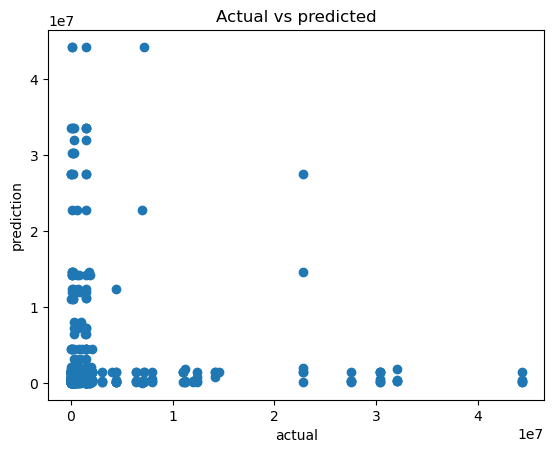

In [94]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('Actual vs predicted')
plt.show()

In [95]:
final_model2.fit(x_train,y_train)
prediction = final_model2.predict(x_test)
print ('R2 score:', r2_score(y_test,prediction))
print ('Mean absolute Error:', mean_absolute_error(y_test,prediction))
print ('Mean squared Error:', mean_squared_error(y_test,prediction))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,prediction)))

R2 score: 0.03502611922036025
Mean absolute Error: 1765661.0331877933
Mean squared Error: 18714677740232.227
Root mean squared Error: 4326046.432972285


In [96]:
import joblib
import pickle
filename = 'Rent.pkl'
pickle.dump(final_model2,open(filename,'wb'))

In [97]:
import pickle
loaded_final_model2=pickle.load(open(filename,'rb'))
result = loaded_final_model2.score(x_test,y_test)
print(result*100)

3.5026119220360252


# EDA

1. The data consist of both float and object data type, in 5325 of 6 columns null values were 
   fixed and the data was separated into numerical and categorical data in other to deal check
   for the relationship in only the numerical. 
2. The postal_code has outliers and was removed using quantile method
3. The categorical column were converted using ordinal encoder
4. After the ambiquos nan were also treated again
5. I standardised the data afterward and check for cullinerity, which i discovered that there were no cullinerity
6. Then proceded to train the data and all necessary scores was checked, then i settled for a model that has the lowest cross validation score as to
   build my final model for both price and area prediction.
7. Hyper parameter tunning was done in other to have a better model.
8. But i discovered that i have high root mean square error, which might be caused by not having enough data to determined the prediction and this could
   have happened during the the time of scrapping the data.